In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

In [3]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [4]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [5]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

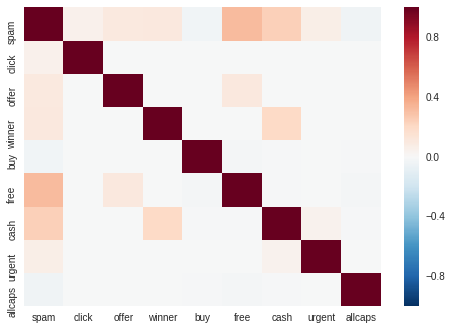

In [6]:
sns.heatmap(sms_raw.corr())

In [7]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [14]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import RFE

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()
selector = RFE(bnb)

selector = selector.fit(data, target)

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

print(data.head())

Number of mislabeled points out of a total 5572 points : 604
   click  offer winner    buy   free   cash urgent allcaps
0  False  False  False  False  False  False  False   False
1  False  False  False  False  False  False  False   False
2  False  False  False  False  False  False  False   False
3  False  False  False  False  False  False  False   False
4  False  False  False  False  False  False  False   False


In [13]:
print(selector.ranking_)

[1 3 2 1 5 4 1 1]


Where click, winner, urgent and allcaps were ranked highest.